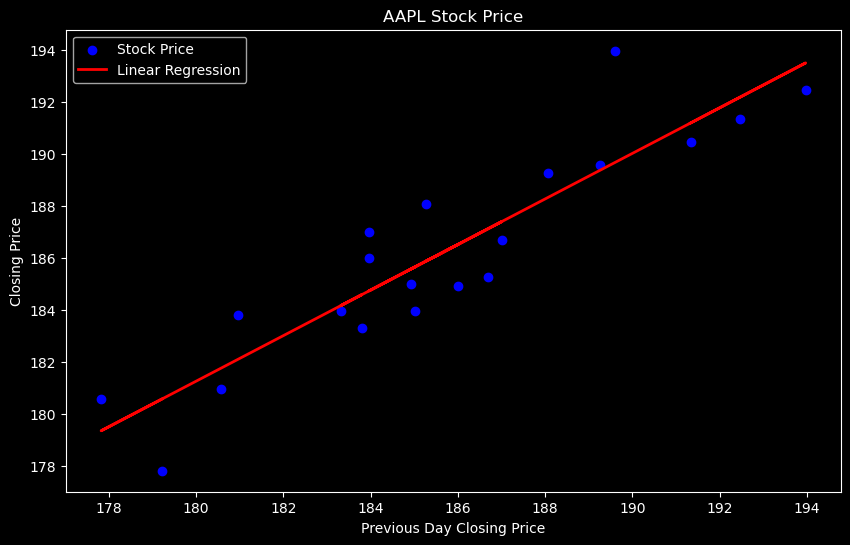

Today's price is expected to go up.
Today's predicted closing price: 191.1893569580004


C:\Users\sb40956\AppData\Local\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Define the stock symbol and timeframe
stock_symbol = "AAPL"
timeframe = "1mo"

# Fetch the latest stock data using yfinance API
stock_data = yf.download(stock_symbol, period=timeframe, progress=False)

# Preprocess the data
stock_data = stock_data.dropna()  # Remove missing values

# Add a feature: previous day's closing price
stock_data['PrevClose'] = stock_data['Close'].shift(1)

# Split the data into features (X) and target variable (y)
X = stock_data[['PrevClose']].dropna()
y = stock_data['Close'].iloc[1:]

# Train the linear regression model
model = LinearRegression()
model.fit(X, y)

# Plot the stock price data and linear regression line
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Stock Price')
# plt.figure(facecolor='black')
plt.plot(X, model.predict(X), color='red', linewidth=2, label='Linear Regression')
plt.xlabel('Previous Day Closing Price')
plt.ylabel('Closing Price')
plt.title(f'{stock_symbol} Stock Price')
plt.legend()
plt.show()

# Predict today's price
last_data_point = stock_data[['PrevClose']].iloc[-1:].values
prediction = model.predict(last_data_point)[0]
today_price = stock_data['Close'].iloc[-1]

if prediction < today_price:
    print("Today's price is expected to go down.")
else:
    print("Today's price is expected to go up.")

print("Today's predicted closing price:", prediction)


In this code, we're using a mathematical technique called linear regression to predict if today's stock price for Apple Inc. (AAPL) will go up or down based on the price of the stock on the previous day.

To do this, we start by getting the historical stock data for the past month. We remove any missing data to ensure accuracy.

Next, we add a new piece of information called the "Previous Day Closing Price." This tells us the price of the stock on the day before.

Then, we split the data into two parts: one part that contains the "Previous Day Closing Price" (X) and another part that contains the actual closing prices of the stock (y).

We use the X and y data to train a model called linear regression. This model looks for patterns and relationships between the previous day's closing price and the current day's closing price.

After training the model, we plot the historical stock prices as scatter points and draw a straight line called the "linear regression line" that represents the relationship between the previous day's price and the current day's price.

Using this line, we can make a prediction for today's closing price based on the previous day's closing price. In this case, the model predicts that today's price will go up.

We compare the predicted price with the actual price for today and print whether the model expects the price to go up or down.

Finally, we display the predicted closing price for today.

It's important to remember that this prediction is based solely on the previous day's price and does not take into account other factors that can influence stock prices. Stock prices are influenced by various factors, and it's always a good idea to consider additional information and consult multiple sources before making any investment decisions based on these predictions.






